### Indeed.ca Job Title Summary Data NLP

In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("sept_final_preprocessed.csv", usecols = ['job_title','company_name','summary'])

In [4]:
df.head()

,job_title,company_name,summary
0,"['summer', 'intern', 'data', 'science', 'engin...",hsbc bank canada,"['building', 'changing', 'predictive', 'analyt..."
1,"['student', 'intern']",skyworks,"['strong', 'data', 'analysis', 'skill', 'suppo..."
2,"['data', 'scientist', 'intern']",geotab,"['data', 'scientist', 'intern', 'work', 'along..."
3,"['data', 'engineer', 'omnia', 'ai', 'co', 'op'...",deloitte,"['fascinated', 'data', 'structures', 'data', '..."
4,"['data', 'science', 'intern', 'winter', 'toron...",intact,"['currently', 'looking', 'interns', 'data', 'l..."


In [5]:
# https://www.kaggle.com/itratrahman/nlp-tutorial-using-python analysis ideas
# top words in job title
# top words in summary by job title top words?
# top words in summary by job title top words by company?
# TF-IDF extraction? 
# ... training models etc depends on shape of top words data

# might have to do iterative process to check proportion of \n
# summary top words per job title top words per company?

#### Top Words Analysis

In [9]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(df['job_title'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

In [10]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

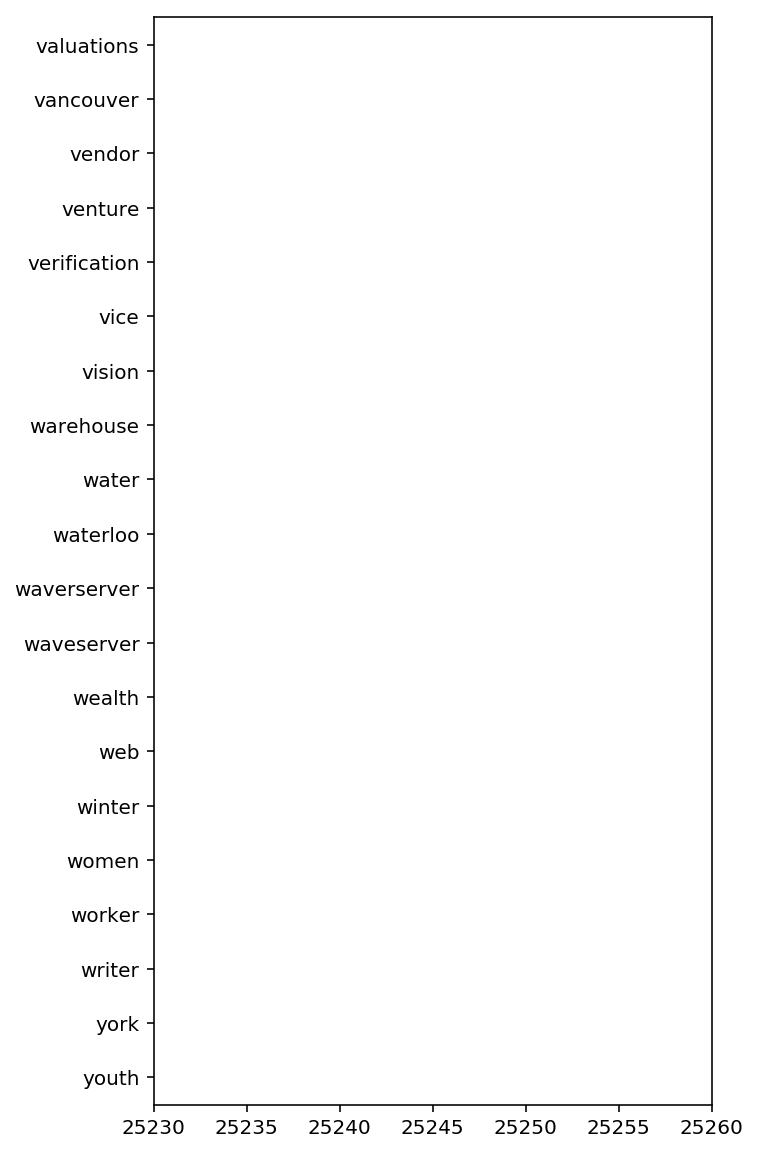

In [11]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))